In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv("data1.csv", header=None)
df

,0,1
0,13.046815,14.741152
1,13.408520,13.763270
2,14.195915,15.853181
3,14.914701,16.174260
4,13.576700,14.042849
...,...,...
302,12.476629,14.459370
303,19.582573,10.411619
304,23.339868,16.298874
305,18.261188,17.978309


In [100]:
X_train = df.to_numpy()

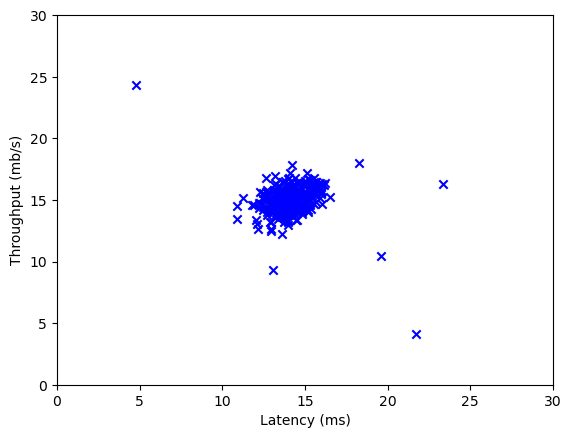

In [101]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='x', c='b') 

# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

In [102]:
def estimate_mean_and_variance(X): 
    """
    Calculates mean of an array
    in the dataset
    
    Args:
        X (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    """

    m, n = X.shape
    
    ### START CODE HERE ### 
    # m = number of training examples
    # n = number of features
    mu = np.zeros(n)
    var = np.zeros(n)
    
    for i in range(0, n):
        sum = 0
        for j in range(0, m):
            sum += X[j][i]
        avg = sum / m
        mu[i] = avg
        
    for i in range(0, n):
        sum = 0
        for j in range(0, m):
            sum += (X[j][i] - mu[i])**2
        avg = sum / m
        var[i] = avg
        
    
    ### END CODE HERE ### 
        
    return mu, var

In [103]:
estimate_mean_and_variance(X_train)

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [104]:
X_means = np.mean(X_train, axis=0)
X_means

array([14.11222578, 14.99771051])

In [105]:
X_variances = np.var(X_train, axis=0)
X_variances

array([1.83263141, 1.70974533])

In [106]:
import math

def gaussian_prob(x, mean, var):
    return (1/np.sqrt(var * 2 * math.pi)) * np.exp(-0.5 * (x - mean)**2 / var)

In [107]:
gaussian_prob(X_train[0][0], X_means[0], X_variances[0])

0.2162097663344638

In [108]:
g = np.vectorize(gaussian_prob)
g(X_train[:, 0], X_means[0], X_variances[0])

array([2.16209766e-01, 2.57452082e-01, 2.94132233e-01, 2.47211916e-01,
       2.72515466e-01, 2.91811896e-01, 1.87139581e-01, 1.51176482e-01,
       9.35633057e-02, 1.66608997e-01, 2.93387080e-01, 2.94487687e-01,
       2.55592373e-01, 2.55956210e-01, 2.93271402e-01, 2.94445597e-01,
       2.92880166e-01, 2.85183307e-01, 2.77277592e-01, 9.48976547e-02,
       2.70272714e-01, 2.93421614e-01, 2.41105554e-01, 2.93042880e-01,
       1.96077288e-01, 1.56529792e-01, 2.75904587e-01, 2.57496215e-01,
       2.76670469e-01, 2.83495303e-01, 1.70682833e-01, 2.93186130e-01,
       2.04326372e-01, 1.95772969e-01, 1.08970523e-01, 2.45951257e-01,
       1.40637462e-01, 2.94633744e-01, 2.80527513e-01, 2.93718568e-01,
       2.81681579e-01, 2.25242931e-01, 2.82189417e-01, 2.94296621e-01,
       2.66749616e-01, 2.88560129e-01, 1.11371040e-01, 2.94677206e-01,
       2.89041960e-01, 1.85565846e-01, 2.40902893e-01, 2.79275320e-01,
       2.85710057e-01, 2.94679955e-01, 2.79865441e-01, 2.94563913e-01,
      

In [109]:
g = np.vectorize(gaussian_prob)
g(X_train[:, 1], X_means[1], X_variances[1])

array([2.99284746e-01, 1.95392360e-01, 2.46318960e-01, 2.03532846e-01,
       2.33693033e-01, 1.45498945e-01, 2.56009184e-01, 2.41513408e-01,
       1.99499132e-01, 3.04234834e-01, 9.03757851e-02, 2.87662344e-01,
       2.77971214e-01, 2.71738637e-01, 1.28818679e-01, 2.80876874e-01,
       2.99754412e-01, 3.04633203e-01, 2.49464313e-01, 1.02581058e-01,
       2.80112059e-01, 3.01193924e-01, 1.55160458e-01, 2.97354362e-01,
       2.10442712e-01, 1.58947531e-01, 2.86657540e-01, 2.94850510e-01,
       2.92137101e-01, 2.70338163e-01, 2.93628532e-01, 3.00320581e-01,
       3.02398969e-01, 3.04554030e-01, 1.91817067e-01, 1.86190141e-01,
       2.51297325e-01, 2.78748292e-01, 2.58201165e-01, 2.89320696e-01,
       2.27873738e-01, 2.95141101e-01, 2.96810187e-01, 2.91413599e-01,
       2.60404516e-01, 2.03936058e-01, 2.96893121e-01, 2.38597568e-01,
       2.68990183e-01, 1.93941438e-01, 3.05090900e-01, 2.70775656e-01,
       2.99146204e-01, 3.04690408e-01, 2.71095395e-01, 2.86679305e-01,
      

In [110]:
def data_prob(x1, x2, x1mean, x1var, x2mean, x2var):
    return gaussian_prob(x1, x1mean, x1var) * gaussian_prob(x2, x2mean, x2var)

In [111]:
X_train[0, :]

array([13.04681517, 14.74115241])

In [112]:
def compute_probs(X, means, variances):
    probs = []
    for i in range(X.shape[0]):
        row = X[i, :]
        x1 = row[0]
        x2 = row[1]
        x1mean = means[0]
        x1var = variances[0]
        x2mean = means[1]
        x2var = variances[1]
        p = data_prob(x1, x2, x1mean, x1var, x2mean, x2var)
        probs.append(p)
    return probs

In [113]:
probs = np.array(compute_probs(X_train, X_means, X_variances))
print(probs)

[6.47082850e-02 5.03041698e-02 7.24503459e-02 5.03157449e-02
 6.36849659e-02 4.24583229e-02 4.79094513e-02 3.65111475e-02
 1.86657982e-02 5.06882606e-02 2.65150876e-02 8.47130184e-02
 7.10473221e-02 6.95531915e-02 3.77788347e-02 8.27029590e-02
 8.77921220e-02 8.68763044e-02 6.91708641e-02 9.73470183e-03
 7.57066462e-02 8.83768075e-02 3.74100482e-02 8.71375788e-02
 4.12630362e-02 2.48800240e-02 7.90901301e-02 7.59228903e-02
 8.08257085e-02 7.66395995e-02 5.01173495e-02 8.80498288e-02
 6.17880843e-02 5.96234468e-02 2.09024061e-02 4.57936992e-02
 3.53418180e-02 8.21286529e-02 7.24325305e-02 8.49788604e-02
 6.41878342e-02 6.64784466e-02 8.37566936e-02 8.57620376e-02
 6.94628047e-02 5.88478152e-02 3.30652956e-02 7.03092646e-02
 7.77494498e-02 3.59889070e-02 7.34972805e-02 7.56209580e-02
 8.54690789e-02 8.97861557e-02 7.58702323e-02 8.44453777e-02
 8.67966985e-02 8.93502381e-02 7.83008863e-02 6.09965756e-02
 6.89175589e-02 8.93992597e-02 2.35608690e-02 3.92180895e-02
 3.46818929e-02 7.058175

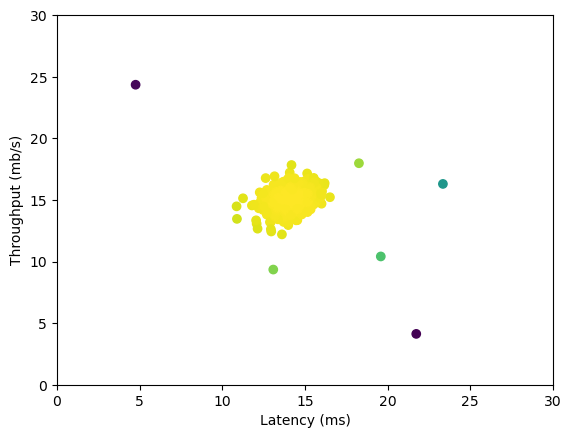

In [114]:

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=np.log(probs)) 

# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()

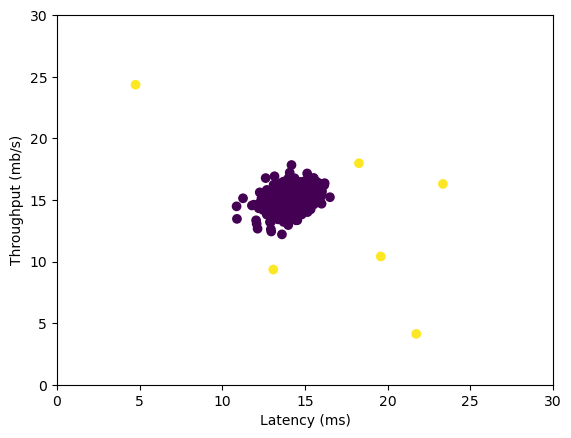

In [117]:
epsilon = .001

colors = probs < epsilon

plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=colors) 

# Set the y-axis label
plt.ylabel('Throughput (mb/s)')
# Set the x-axis label
plt.xlabel('Latency (ms)')
# Set axis range
plt.axis([0, 30, 0, 30])
plt.show()